In [11]:
#import lib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#define variables
SYMBOL = 'AAPL'
START_DATE = '2020-01-01'
END_DATE = '2024-12-31'
INTERVAL = '1d'

STARTING_BALANCE = 10000
MA_PERIOD = 200

#download data
data = yf.download(SYMBOL, start=START_DATE, end=END_DATE, interval=INTERVAL, multi_level_index=False)

data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [13]:
#calculate daily return for close/close and close/open
data['Return'] = data.Close / data.Close.shift(1)

#calculate buy and hold balance
data['Bench_Bal'] = data.Return.cumprod() * STARTING_BALANCE

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal
Date,,,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,1.003065,35066.485406
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1.011478,35468.980874
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1.003176,35581.619171
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0.986758,35110.442838
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0.986737,34644.758037


In [14]:
#calculate moving average
data['SMA'] = data.Close.rolling(window = MA_PERIOD).mean()

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA
Date,,,,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,1.003065,35066.485406,210.752678
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1.011478,35468.980874,211.182570
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1.003176,35581.619171,211.614168
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0.986758,35110.442838,212.039085
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0.986737,34644.758037,212.437766


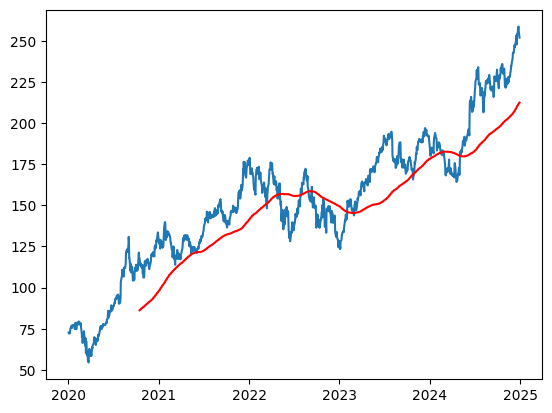

In [15]:
#plot chart with moving average overlaid
plt.plot(data.Close)
plt.plot(data.SMA, color="red")
plt.show()

In [16]:
#Hold a position for every day the close is above the 200 MA
data['Long'] = data.Close > data.SMA

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA,Long
Date,,,,,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,1.003065,35066.485406,210.752678,True
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1.011478,35468.980874,211.182570,True
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1.003176,35581.619171,211.614168,True
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0.986758,35110.442838,212.039085,True
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0.986737,34644.758037,212.437766,True


In [17]:
#calculate the daily return from Open to Open on days in the market
#on days when there is no trade, return is 1
data['Sys_Return'] = np.where(data.Long.shift(1) == True, data.Return, 1)

#calculate system balance
data['Sys_Bal'] = STARTING_BALANCE * data.Sys_Return.cumprod()

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,1.003065,35066.485406,210.752678,True,1.003065,17120.161886
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1.011478,35468.980874,211.182570,True,1.011478,17316.668251
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1.003176,35581.619171,211.614168,True,1.003176,17371.660528
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0.986758,35110.442838,212.039085,True,0.986758,17141.622787
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0.986737,34644.758037,212.437766,True,0.986737,16914.266122


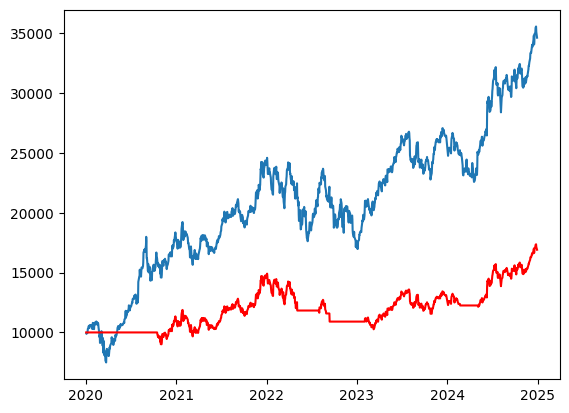

In [18]:
plt.plot(data.Bench_Bal)
plt.plot(data.Sys_Bal, color="red")

plt.show()